# Анализ и подготовка плана действий по удержанию клиентов сети фитнес-центров

**Описание проекта**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; 
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
   1) выделить целевые группы клиентов;
   2) предложить меры по снижению оттока;
   3) определить другие особенности взаимодействия с клиентами.

**Описание данных**

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

## Шаг. Загрузим данные 

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')


In [3]:
gym = pd.read_csv('/datasets/gym_churn.csv', sep=',')

In [4]:
# посмотрим общую информацию о данных
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# посмотрим на 5 первых значений
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


В датафрейме 14 колонок с записями о клиентах и действиях. Всего 4000 строк в каждом столбце, значит, пропусков нет.

In [6]:
# приведем названия столбцов датафрейма к нижнему регистру
gym.columns = map(str.lower, gym.columns)

In [7]:
# заменим тип данных у столбца 'Month_to_end_contract' с float64 на int64
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

In [8]:
# проверим на дубликаты
gym.duplicated().sum()

0

**Вывод**

В датафрейме 14 колонок с записями о клиентах и действиях. Всего 4000 строк в каждом столбце, значит, пропусков нет и дубликатов нет. Название столбцов в датафрейме приведены к нижнему регистру. В 'Month_to_end_contract' тип данных заменен с float64 на int64.

## Шаг. Проведем исследовательский анализ данных (EDA)

### Изучим средние значения и стандартные отклонения методом describe() 

In [9]:
# используя метод describe() проверим данные на корректность
gym.describe().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


**Вывод**

В ходе проверки выявлено:
    - мужчин и женщин в фитнес-клубе одинаковое количество;
    - большинство клиентов проживает вблизи фитнес-центра - 85%;
    - почти половина клиентов сотрудники компаний-партнеров;
    - 30% приводят друзья;
    - 90 % пользователей оставляют свой номер телефона;
    - в основном абонемент покупают на 6 месяцев;
    - более 41% посещают груповые занятия;
    - основной возраст клиентов 29 лет, самому молодому 18 лет, самому старшему 41 год;
    - в среднем дополнительные покупки делают на 146 у.е., медианное значение 136 у.е;
    - среднее количество месяцев посещения 3,7;
    - среднее количество посещений в неделю за все время практически совпадает с количеством за текущий месяц и составляет ~2 посещения в неделю;
    - средний отток составляет 27%.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался методом groupby()

In [10]:
# выведем средние значения и стандартные отклонения всех признаков 
gym.groupby('churn').mean().round(2).T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**Вывод**

Среди тех кто остался, больше всего тех, кто рядом живет, сотрудник компании-партнера, пришел с другом/друзьями, давно (около полугода) в клубе
посещает групповые занятия, кто постарше, кто больше тратит на доп.услуги (но разница незначительна)
у кого до конца абонемента еще полгода
у постоянных клиентов (кто давно в клубе)
посещает фитнес от 2-х раз в неделю
По средним значениями видно: 
    - распределение по полу примерно равное как для тех кто ушел, так и для тех, кто остался;
    - из тех, кто ушел, 77% жили или работали там, где находился фитнес-центр, 
    - 18% первоначально записывались в рамках акции «приведи друга»;
    - признак phone с наличием контактного телефона тоже не отличатся (90%) для обеих групп;
    - среди тех, кто ушел, только 27% посещали групповые занятие, а среди тех, кто остался, таких 46%;
    - видим, что ушедшие - это люди с небольшим периодом контракта (1-2 месяца), оставшиеся - с большим периодом контракта (5-6 месяцев);
    - возраст практически одинаковый для обеих групп (26-30 лет);
    - среди ушедших средние траты были примерно 115 у.е, а среди оставшихся - 158 у.е.;
    - среди ушедших средний лайфтайм с момента первого обращения в фитнес-центр - меньше месяца;
    - средняя частота посещений в неделю за предыдущий месяц у тех, кто остался, больше (2 раза в неделю), чем у тех, кто ушел (1 раз в неделю).

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [11]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался
gym_churn_1 = gym[gym['churn']==1]
gym_churn_0 = gym[gym['churn']==0]

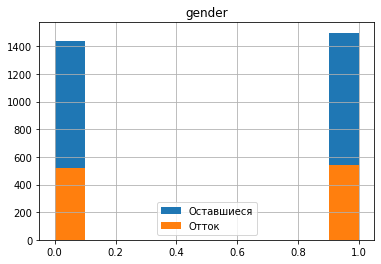

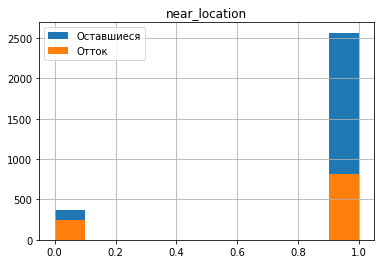

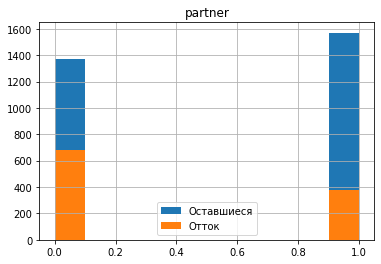

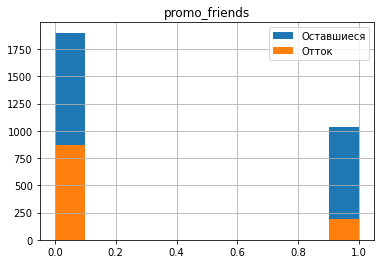

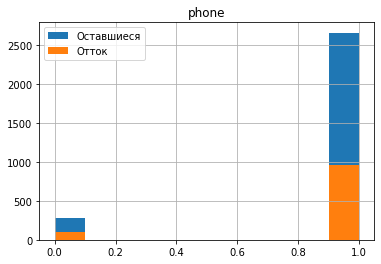

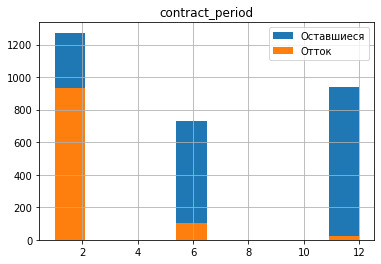

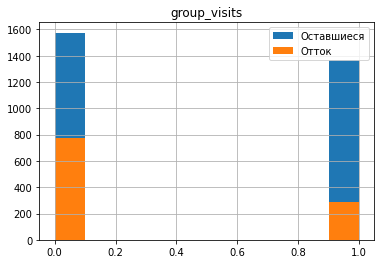

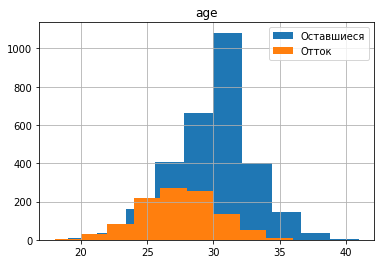

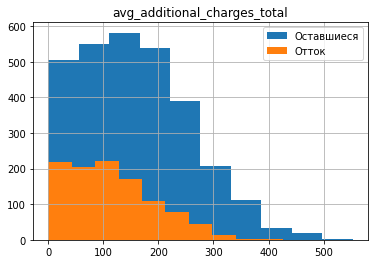

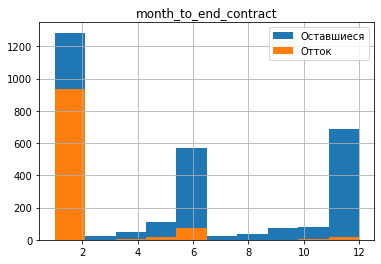

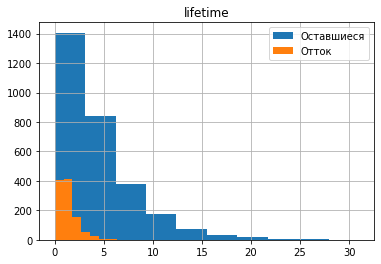

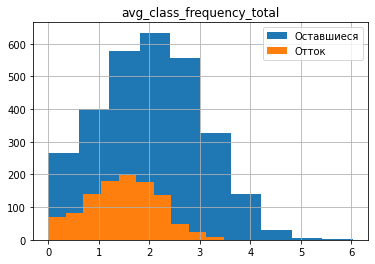

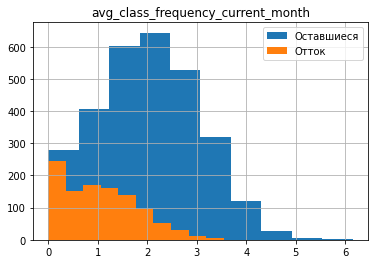

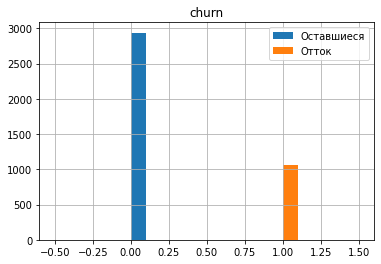

In [12]:
for column in gym.columns:
    gym.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()


### Построим  и отобразим матрицу корреляций 

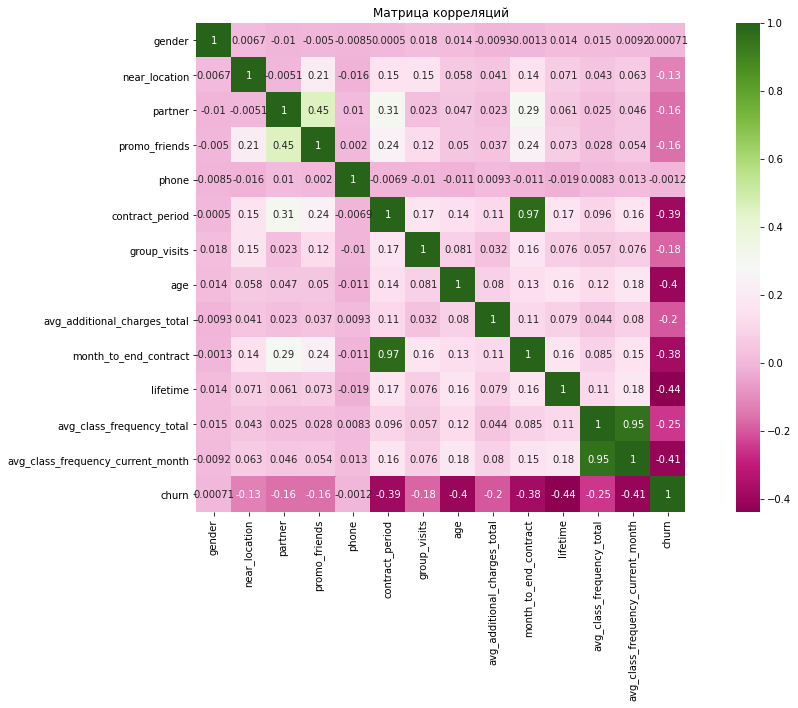

In [13]:
# корреляционная матрица
corr = gym.corr()

# нарисуем heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(corr, annot = True, square = True, cmap="PiYG")
plt.title('Матрица корреляций')
plt.show()

**Вывод**

Согласно матрице корреляций почти все признаки слабо коррелируют между собой, кроме 'month_to_end_contract' с 'contract_period' и 'avg_class_frequency_current_month' и 'avg_class_frequency_total'. 
Длительность текущего действующего абонемента хорошо коррелирует со сроком до окончания текущего действующего абонемента (0.97). Также сильная корреляция между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0.95).

Корелляция послабее (0.45) наблюдается между призаком 'partner' (сотрудник компании-партнёра клуба) и признаком 'promo_friends' (факт первоначальной записи в рамках акции «приведи друга»). Возможно, коллеги по работе рекомендовали клуб другим своим коллегам.



Не стала удалять дублирующие признаки (gym = gym.drop(columns=['contract_period', 'avg_class_frequency_current_month']), чтобы исключить мультиколлинеарность т.к. на случайный лес это не влияет и у нас основная модель кластеризации, в которой наоборот, чем больше признаков, тем лучше. Поэтому удалять признаки не будем.


## Шаг. Построим модель прогнозирования оттока пользователей

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Разобъем данные на обучающую и валидационную выборки функцией train_test_split()

In [14]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(columns=['churn'], axis = 1)
y = gym['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

### Обучим модель на train-выборке двумя способами: моделью логистической регрессией и моделью случайного леса

In [15]:
# задайте алгоритм для нашей модели
model = LogisticRegression(solver = 'liblinear', random_state=0)

# обучите модель
model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы

predictions = model.predict(X_test)

print('Метрики для модели логистической регресии:')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions)))

Метрики для модели логистической регресии:
Accuracy: 0.931
Precision: 0.894
Recall: 0.840


In [16]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(random_state = 0)

# обучим модель случайного леса

rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы

rf_predictions = rf_model.predict(X_test)

# выведем все метрики
print('Метрики для модели случайного леса:')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели случайного леса:
Accuracy: 0.922
Precision: 0.875
Recall: 0.825


**Вывод**

Обе модели показывают хорошую долю правильных ответов - 93% на логистичской регрессии и 92% случайным лесом. Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии, следовательно, лучше себя показала логистическая регрессия.
    

## Шаг. Проведем кластеризацию пользователей без столбца целевого значения

### Стандартизируем данные

In [17]:
# создадим новый датафрейм, без столбца с оттоком клиентов
gym_st = gym.drop('churn', axis=1)

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_st)

### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков, нарисуем дендрограмму

In [18]:
# построим матрицу расстояний функцией linkage()
linked = linkage(x_sc, method = 'ward')

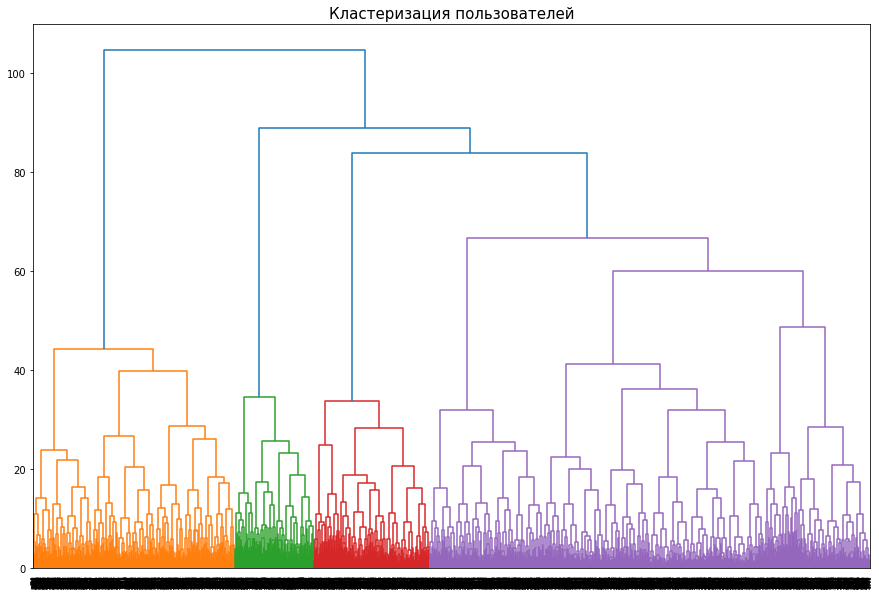

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей', fontsize=15)
plt.show()

На основании полученного графика можно выделить 4 кластера. Согласно техническому заданию количество кластеров равно n=5. После определения оптимального числа кластеров можно запустить более быстрый алгоритм K-Means.

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозирукм кластеры клиентов

In [20]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
gym['cluster_churn'] = labels

### Посмотрим на средние значения признаков для кластеров

In [21]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster_churn').agg('mean').T

cluster_churn,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


**Вывод**

После разделения на 5 кластеров можно выявить следующие закономерности:

1. В 0 кластере собраны клиенты, которые живут близко к клубу и пришли по акции друзей. Большинство - это сотрудники компании-партнёра клуба. В клуб они ходят около 5 месяцев, на дополнительные услуги тратят довольно много (161 у.е.). Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю. Отток таких клиентов менее ~1%.

2. В 1 кластере собраны клиенты, не оставившие номер телефона. Живут довольно близко к клубу, половина из клиентов - сотрудники компании-партнёра клуба. Отток таких клиенов небольшой, примерно 27%.

3. В 2 кластере собраны клиенты, которые живут далеко от клуба, являются сотрудниками компании-партнёра клуба, мало посещают групповые занятия,  в клуб они ходят около 3 месяцев. Отток таких клиентов средний и составляет ~44%

4. В 3 кластере собраны клиенты, которые живут близко к клубу, со средней активностью посещают групповые занятия. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 1 раз в неделю. Отток таких клиентов самый значительный и составляет ~52%. . 

5. В 4 кластере собраны клиенты, которые живут близко к клубу. В клуб ходят около 5 месяцев, на дополнительные услуги тратят довольно много (162 у.е.). Средняя частота посещений в неделю за все время с начала действия абонемента ~ 3 раза в неделю. Отток таких клиентов менее ~1%.

### Построим графики распределения всех признаков по кластерам

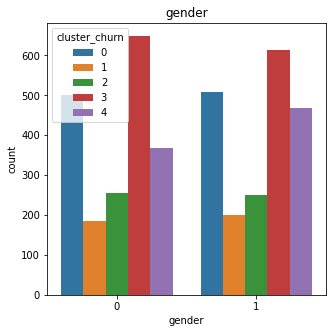

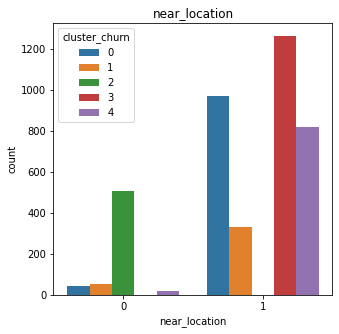

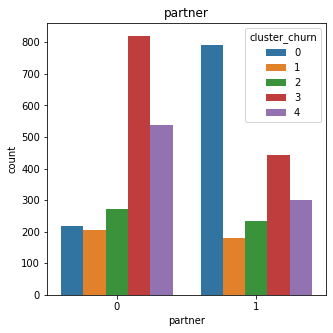

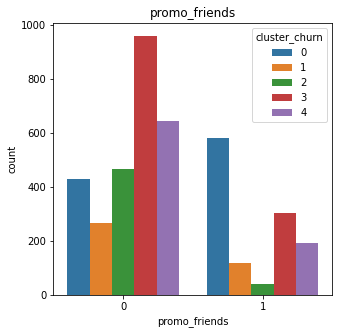

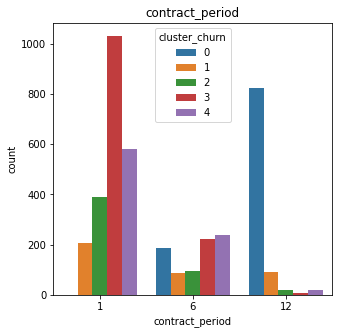

In [22]:
# построим гистограмму для столбцов 'gender', 'near_location', 'partner', 'promo_friends', 'contract_period'
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gym[column], hue='cluster_churn', data=gym)
    plt.title(column)
    plt.show()

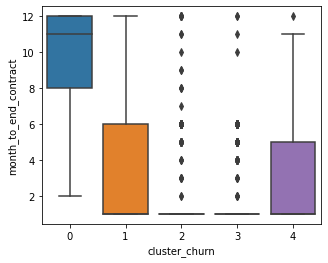

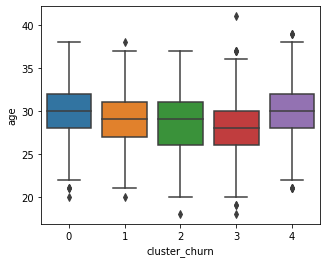

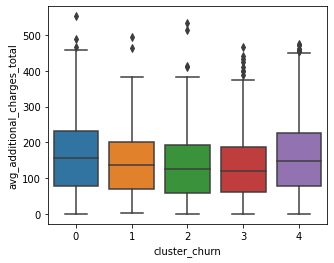

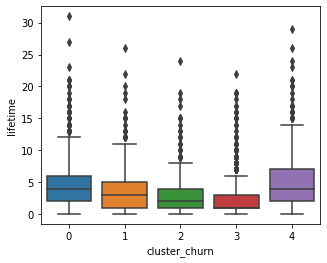

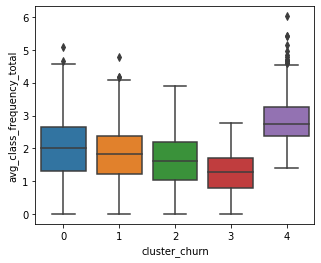

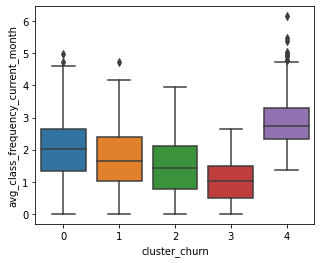

In [23]:
# построим “диаграммы размаха” для столбцов 'month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x = 'cluster_churn', y = gym[column], data = gym)
    plt.show()

### **Вывод**

**Признак 'gender' (Пол)**:

Распределение по полу во всех кластерах практически равное. 

**Признак 'Near_Location' (проживание или работа в районе, где находится фитнес-центр)**:

В кластерах 0, 1, 3, 4 клиенты проживают или работают в районе, где находится фитнес-ценр. Кластер 2 содержит клиентов, которые живут в других районах, то есть, дальше от центра.

**Признак 'Partner' (сотрудник компании-партнёра клуба)**:

В кластере 0 большая часть клиентов (78%) - сотрудники компании-партнёра клуба. В кластерах 1 и 2 почти половина клиентов - это сотрудники компании-партнёра клуба. В кластере 3 и 4 сосредоточились клиенты, в большинстве своём не являющиеся сотрудниками партнеров клуба.

**Признак 'Promo_friends' (факт первоначальной записи в рамках акции «приведи друга»)**:

В кластере 1, 2, 3 и 4 содержится информация о клиентах, которые в большинстве своем пришли в клуб не по акции. В кластере 0 находятся клиенты, пришедшие по акции «приведи друга».

**Признак 'Phone' (наличие контактного телефона)**:

Во всех кластерах, кроме 1, у клиентов есть оставленный номер телефона.

**Признак 'Group_visits' (факт посещения групповых занятий)**:

Примерно половина клиентов из кластеров 0, 1, 4 посещали групповые занятия. Большинство клиентов из кластера 2, 3 не ходили на групповые занятия.

**Признак 'Age' (возраст)**:

Во всех кластерах возраст распределен равномеро и находится в районе 28-30 лет.

**Признак 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра)**:

Чуть больше трат замечено в кластерах 0 и 4 (среднее в районе 160-163 у.е.), меньше всего трат в кластере 3 (среднее - 132 у.е.).

**Признак 'Month_to_end_contract' (срок до окончания текущего действующего абонемента)**:

Меньше всего времении до окончания контракта осталось у клиентов из кластера 3(около 2 месяцев), больше всего времени есть у кластера 0 (около 10 месяцев).

**Признак 'Lifetime' (время с момента первого обращения в фитнес-центр)**:

Среднее время с момента первого обращения в фитнес-центр у кластеров 0, 1, 4 составляет 4-5 месяцев, у клиентов из кластеров 2 и 3, значение меньше - около 3 месяцев.

**Признак 'Avg_class_frequency_total' (средняя частота посещений в неделю за все время с начала действия абонемента)**:

Самая высокая средняя частота посещений в неделю у кластера 4 (3 раза внеделю), самая низкая - у кластера 3.

**Признак 'Churn' (факт оттока в текущем месяце)**:

В 1 и 4 кластерах собраны клиенты с меньшим оттоком, в 1 кластере средний отток больше (~ 27%).
Самый сильный отток в кластерах 2 и 3 от 44-52%.

### Посчитаем долю оттока для каждого полученного кластера методом groupby()

In [24]:
#посчитаем долю оттока
churn_share = gym.groupby('cluster_churn')['churn'].agg('sum') / gym.groupby('cluster_churn')['churn'].size()
display(churn_share)

cluster_churn
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Кластеры 3 и 4 склонны к оттоку (44 - 52% клентов ушло), кластеры 1 и 2 более надёжны (ушло тменее 1% клиентов).

## Вывод

Из анализа можно сделать вывод, что для клиентов кластеров с наименьшим оттоком характерно: cредний возраст 30 лет; проживют в районе, где находится фитнес центр; чаще других посещают групповые занятия и покупают услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон; средняя частота посещений в неделю ~ 2-3 раза; время с момента первого обращения в фитнес-центр ~ 4 - 5 месяцев.

На основе проведенного анализа рекомендуется:

1. Поддерживать и мотивировать  кластеры, с наименьшим оттоком клиентов:

- активная (таргетированная) реклама на клиентов, находящихся в непосредственной близости от фитнес-центра;
- привлечение новых клиентов по акции "приведи друга";
- повышение вовлеченности на групповых занятиях (например внедрениепоощрение их посещения);
- проведение бесплатных занятий с выдающими тренерами или победителями международних соревнований по  фитнесу;
- организовывать специальные предложения на абонементы длительностью от года, т.к. такие клиенты реже перестают ходить;
- расширение программы привлечения сотрудников компаний-партнеров и списка самих партнеров.

2. Улучшение и поддержание интерьера клуба и работоспособности тренажеров, чтобы клиентам было так же комфортно заниматься в нем, как раньше.

3. Организовать индивидуальный подход к клиентам (заинтересованность их успехами, предложение советов и помощи, чтобы их поддержать).